In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 加载数据
house = fetch_openml(name='house_prices', as_frame=True)
data = house.data
target = house.target

# 分割训练和测试数据
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=2)

# 创建一个列变换器，对不同类型的列使用不同的处理
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler())      #MinMaxScaler()是归一化，而不是标准化，这里要注意，归准化应该写‘StandardScaler()’
        ]), num_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_columns)
    ])

# 应用预处理
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# 获取列名，数值列和独热编码的类别列
num_feature_names = num_columns
cat_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(cat_columns)

# 将列名合并
all_feature_names = num_feature_names + list(cat_feature_names)

# 如果需要，将稀疏矩阵转换回DataFrame
#X_train_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
#X_test_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

X_train_df = pd.DataFrame(X_train_preprocessed.toarray(), columns=all_feature_names)
X_test_df = pd.DataFrame(X_test_preprocessed.toarray(), columns=all_feature_names)


C:\Users\Administrator.DESKTOP-CDML10A\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


X_train_df

In [27]:
# 合并训练集和测试集的特征数据
X = pd.concat([X_train_df, X_test_df], ignore_index=True)

# 合并训练集和测试集的目标变量
y = pd.concat([pd.Series(y_train), pd.Series(y_test)], ignore_index=True)

# 初始化归一化器
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 归一化 y
# 注意，MinMaxScaler().fit_transform() 需要一个2D array，因此我们使用 y.values.reshape(-1, 1) 来转换 y
y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))
# 将归一化后的 y 转换回 Pandas Series
y_normalized = pd.Series(y_normalized.flatten())  # 使用 flatten() 来将数组从2D转换为1D

# 将目标变量 'y' 添加到特征数据集 'X'，并命名为 'SalePrice' 或其他适当的列名
X_plus_y = X
X_plus_y['y'] = y_normalized

# 重命名DataFrame，含义上更清晰
data_new = X_plus_y

# 显示结果
print(data_new.head())

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  0.311857    0.000000     0.202055  0.037999     0.666667        0.625   
1  0.591501    0.000000     0.167808  0.030192     0.444444        0.500   
2  0.345442    0.823529     0.010274  0.003887     0.555556        0.500   
3  0.968472    0.000000     0.229452  0.044520     0.777778        0.500   
4  0.952022    0.176471     0.133562  0.021158     0.555556        0.625   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_New  \
0   0.731884      0.383333     0.20000    0.162296  ...           0.0   
1   0.630435      0.150000     0.00000    0.203402  ...           0.0   
2   0.739130      0.400000     0.00000    0.045535  ...           0.0   
3   0.963768      0.933333     0.22875    0.172927  ...           0.0   
4   0.500000      0.000000     0.00000    0.066442  ...           0.0   

   SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  SaleCondition_AdjLand  \
0           0.0          1

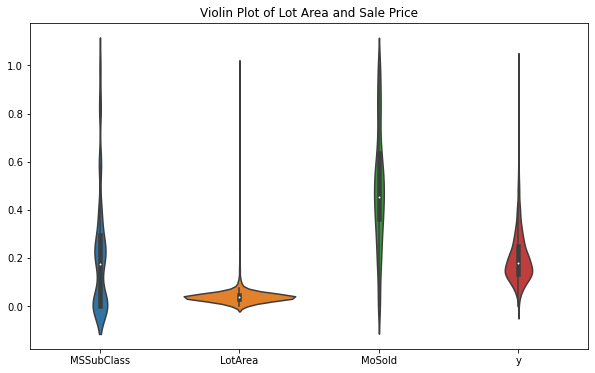

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 选择特定的变量
selected_data = data_new[['MSSubClass', 'LotArea','MoSold', 'y']]

# 剔除缺失值，因为小提琴图无法处理缺失值
selected_data = selected_data.dropna()

# 制作小提琴图
plt.figure(figsize=(10, 6))
sns.violinplot(data=selected_data)
plt.title('Violin Plot of Lot Area and Sale Price')
plt.show()